In [2]:
import pandas as pd
# import openpyxl
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
# import seaborn as sns

## データセットの読み込み

In [3]:
# sklearnデータセットに収録されたカルフォルニアの住宅価格のデータセットをロード
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()  # インターネットにアクセスしてダウンロード

# 学習用データのデータフレームを作成
x = pd.DataFrame(housing_data["data"],columns=housing_data["feature_names"])
y = pd.DataFrame(housing_data["target"],columns=["target"])

# データフレームの形状と説明変数の列名を表示
print('feature shape:', x.shape, housing_data["feature_names"])
print('target shape:', y.shape)

feature shape: (20640, 8) ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target shape: (20640, 1)


In [4]:
# データを学習用と検証用に分割 (test_sizeで検証データの比率を指定(0.0-1.0の間), random_stateは乱数シード)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

15480 5160 15480 5160


## 勾配ブースティングモデルの作成

In [5]:
# !pip install LightGBM

In [6]:
import lightgbm as lgb

# LightGBM用のデータセットに入れる
lgb_train = lgb.Dataset(x_train, y_train)
lgb.test = lgb.Dataset(x_test, y_test)

# 評価基準を設定する 
params = {'metric' : 'rmse'}

# 訓練データから回帰モデルを作る
gbm = lgb.train(params, lgb_train)

# テストデータを用いて予測精度を確認する
test_predicted = gbm.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15480, number of used features: 8
[LightGBM] [Info] Start training from score 2.077707


In [7]:
# 平均絶対誤差、平均二乗誤差、決定係数を計算
print('平均絶対誤差 \t\t: {:.4f}'.format(mean_absolute_error(y_pred=test_predicted, y_true=y_test)))
print('平均二乗誤差 \t\t: {:.4f}'.format(mean_squared_error(y_pred=test_predicted, y_true=y_test)))
print('平均平方二乗誤差 \t: {:.4f}'.format(math.sqrt(mean_squared_error(y_pred=test_predicted, y_true=y_test))))
print('決定係数 \t\t: {:.4f}'.format(r2_score(y_pred=test_predicted, y_true=y_test)))
print('(参考) 学習データに対する決定係数: {:.4f}'.format(r2_score(y_pred=gbm.predict(x_train), y_true=y_train)))

平均絶対誤差 		: 0.3118
平均二乗誤差 		: 0.2214
平均平方二乗誤差 	: 0.4705
決定係数 		: 0.8318
(参考) 学習データに対する決定係数: 0.8855


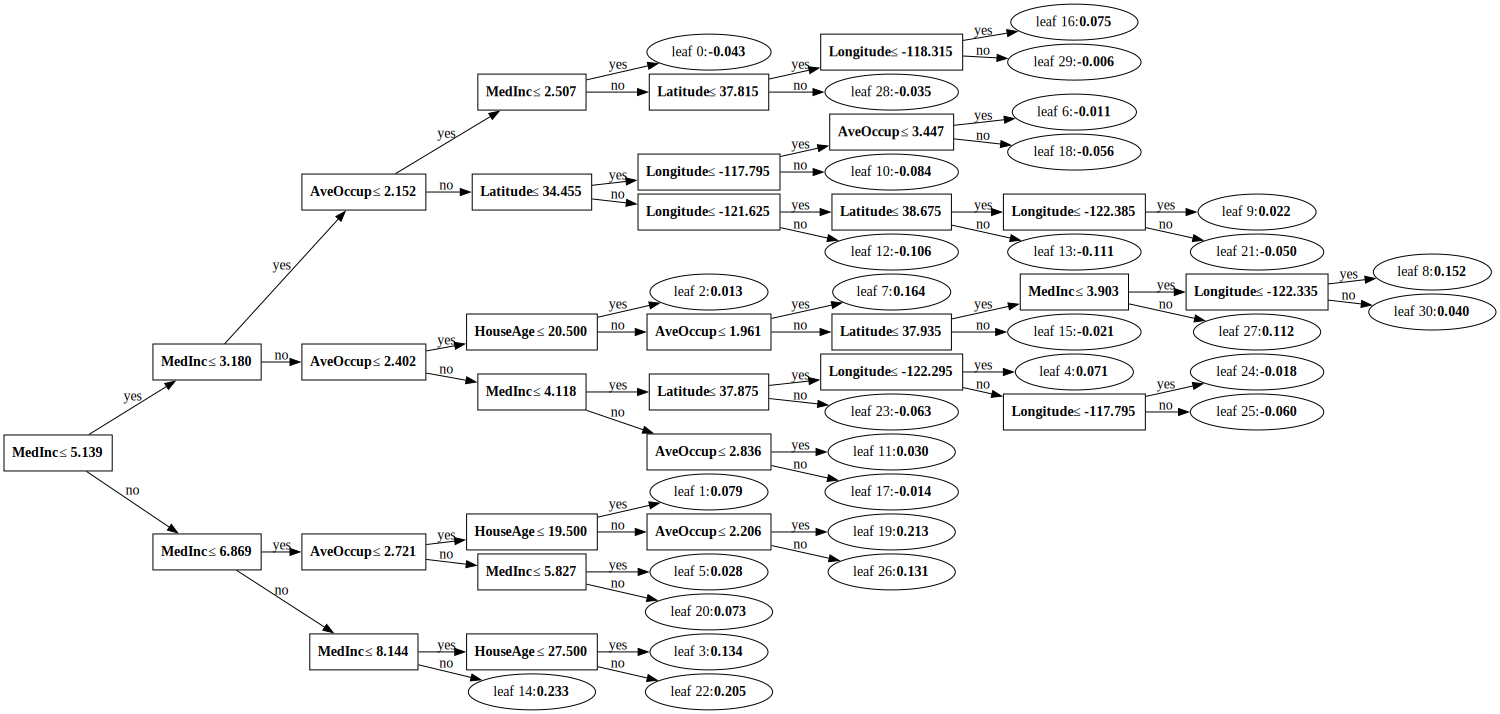

<Figure size 640x480 with 0 Axes>

In [11]:
# グラフの表示
graph = lgb.create_tree_digraph(gbm, 1)
plt.savefig("tree.png")
graph


## Grid Reasearch

## 交差検証

In [9]:
# 暇ならやります